## NOTE
The Purpose of my repos is to learn, in this repo I try to learn how to use TensorFlow Keras, Hyperopt, MLflow to develop a deep learning model

It includes the following steps: 
- STEP 1: DATA PREP
Load and preprocess data 
- STEP 2: Neural Network Model
   * Part 1. Create a neural network model with TensorFlow Keras and view training with inline TensorBoard
   * Part 2. Perform automated hyperparameter tuning with Hyperopt and MLflow and use autologging to save results
   * Part 3. Use the best set of hyperparameters to build a final model
   * Part 4. Register the model in MLflow and use the model to make predictions

This repo follow instructions notebooks provided on DataBricks websites

In [1]:
#tensorflow libraries, mlflow
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import mlflow
import mlflow.keras
import mlflow.tensorflow

## DATA PREP
Using California Housing dataset scikit-learn.

### Load and train-test-split dataset

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

df_cal_housing = fetch_california_housing()

#split train-test
X_train, X_test, y_train, y_test = train_test_split(df_cal_housing.data, df_cal_housing.target, test_size=0.2)

In [3]:
X_train

array([[   1.6063    ,   20.        ,    4.88981289, ...,    2.53014553,
          34.13      , -116.31      ],
       [   2.136     ,    8.        ,    4.10603589, ...,    2.75040783,
          32.81      , -116.94      ],
       [   2.4321    ,   26.        ,    5.10076046, ...,    2.57224335,
          40.88      , -124.09      ],
       ...,
       [   2.9107    ,   27.        ,    5.80733945, ...,    2.99311927,
          34.06      , -117.42      ],
       [   3.6471    ,   12.        ,    4.62837838, ...,    3.4527027 ,
          33.86      , -117.97      ],
       [   3.7031    ,   36.        ,    6.27683616, ...,    2.50847458,
          33.81      , -118.1       ]])

### Scale features
Feature scaling is important when working with neural networks, we will use StandardScaler

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #scaler is fitted by X_train already, using transform only

## Neural Network Model

### Part 1. Create model and view TensorBoard in notebook

In [10]:
#define model
def create_model():
    model = Sequential()
    #relu = rectified linear activation function - looks and acts like a linear function, 
    #but is, in fact, a nonlinear function allowing complex relationships in the data to be learned.
    #Dense is layer, is deeply connected with its preceding layer 
    # which means the neurons of the layer are connected to every neuron of its preceding layer. 
    model.add(Dense(20, input_dim=8, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='linear'))
    return model

In [11]:
#compile the model
model = create_model()
#----
model.compile(loss='mse',
             optimizer='Adam',
             metrics=['mse'])

#### callbacks
callbacks are the special utilities or functions that are executed during training at given stages of the training procedure. Callbacks can help you prevent overfitting, visualize training progress, debug your code, save checkpoints, generate logs, create a TensorBoard, etc. There are many callbacks readily available in TensorFlow, and you can use multiple. 
https://blog.paperspace.com/tensorflow-callbacks/

In [12]:
#create callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#directory
experiment_log_dir = './DB/tb'
checkpoint_path = './DB/keras_checkpoint_weights.ckpt'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=experiment_log_dir)
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='loss', mode='min', patience=3)

history = model.fit(X_train, y_train, validation_split=.2, epochs=35, callbacks=[tensorboard_callback,
                                                                                 model_checkpoint,
                                                                                early_stopping])

Epoch 1/35


2023-03-06 21:47:12.210766: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


409/413 [============================>.] - ETA: 0s - loss: 1.2358 - mse: 1.2358
Epoch 1: val_loss improved from inf to 0.60152, saving model to ./DB/keras_checkpoint_weights.ckpt
INFO:tensorflow:Assets written to: ./DB/keras_checkpoint_weights.ckpt/assets
413/413 [==============================] - 1s 2ms/step - loss: 1.2295 - mse: 1.2295 - val_loss: 0.6015 - val_mse: 0.6015
Epoch 2/35
318/413 [======================>.......] - ETA: 0s - loss: 0.5097 - mse: 0.5097
Epoch 2: val_loss improved from 0.60152 to 0.46944, saving model to ./DB/keras_checkpoint_weights.ckpt
INFO:tensorflow:Assets written to: ./DB/keras_checkpoint_weights.ckpt/assets
413/413 [==============================] - 0s 1ms/step - loss: 0.4982 - mse: 0.4982 - val_loss: 0.4694 - val_mse: 0.4694
Epoch 3/35
323/413 [======================>.......] - ETA: 0s - loss: 0.4430 - mse: 0.4430
Epoch 3: val_loss improved from 0.46944 to 0.43263, saving model to ./DB/keras_checkpoint_weights.ckpt
INFO:tensorflow:Assets written to: ./

Epoch 23/35
347/413 [========================>.....] - ETA: 0s - loss: 0.3019 - mse: 0.3019
Epoch 23: val_loss improved from 0.31730 to 0.31572, saving model to ./DB/keras_checkpoint_weights.ckpt
INFO:tensorflow:Assets written to: ./DB/keras_checkpoint_weights.ckpt/assets
413/413 [==============================] - 1s 2ms/step - loss: 0.3032 - mse: 0.3032 - val_loss: 0.3157 - val_mse: 0.3157
Epoch 24/35
361/413 [=========================>....] - ETA: 0s - loss: 0.3034 - mse: 0.3034
Epoch 24: val_loss improved from 0.31572 to 0.31421, saving model to ./DB/keras_checkpoint_weights.ckpt
INFO:tensorflow:Assets written to: ./DB/keras_checkpoint_weights.ckpt/assets
413/413 [==============================] - 1s 1ms/step - loss: 0.3041 - mse: 0.3041 - val_loss: 0.3142 - val_mse: 0.3142
Epoch 25/35
388/413 [===========================>..] - ETA: 0s - loss: 0.3061 - mse: 0.3061
Epoch 25: val_loss did not improve from 0.31421
413/413 [==============================] - 0s 653us/step - loss: 0.3039 

#### TensorBoard commands

In [13]:
%load_ext tensorboard
%tensorboard --logdir $experiment_log_dir

#### Evaluate model on test dataset

In [15]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 465us/step - loss: 0.3092 - mse: 0.3092


[0.3092231750488281, 0.3092231750488281]

### Part 2. Perform automated hyperparameter tuning with Hyperopt
Hyperopt's job is to find the best value of a scalar-valued, possibly-stochastic function over a set of possible arguments to that function. Whereas many optimization packages will assume that these inputs are drawn from a vector space, Hyperopt is different in that it encourages you to describe your search space in more detail. By providing more information about where your function is defined, and where you think the best values are, you allow algorithms in hyperopt to search more efficiently.
https://github.com/hyperopt/hyperopt/wiki/FMin

#### Create neural network model using variables for number of nodes in hidden layers

In [16]:
def create_model(n):
    model = Sequential()
    model.add(Dense(int(n["dense_l1"]), input_dim=8, activation="relu"))
    model.add(Dense(int(n["dense_l2"]), activation="relu"))
    model.add(Dense(1, activation="linear"))
    return model

#### Create Hyperopt objective function

In [17]:
from hyperopt import fmin, hp, tpe, STATUS_OK, SparkTrials
 
def runNN(n):
  # Import tensorflow 
    import tensorflow as tf
  #create callbacks
    from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

    
  
  # Log run information with mlflow.tensorflow.autolog()
    mlflow.tensorflow.autolog()
  
    model = create_model(n)
 
  # Select optimizer
    optimizer_call = getattr(tf.keras.optimizers, n["optimizer"])
    optimizer = optimizer_call(learning_rate=n["learning_rate"])
 
  # Compile model
    model.compile(loss="mse",
                optimizer=optimizer,
                metrics=["mse"])
 
    history = model.fit(X_train, y_train, validation_split=.2, 
                        epochs=35, verbose=2)
 
  # Evaluate the model
    score = model.evaluate(X_test, y_test, verbose=0)
    obj_metric = score[0]  
    return {"loss": obj_metric, "status": STATUS_OK}

#### Define Hyperopt search space

In [18]:
space = {
  "dense_l1": hp.quniform("dense_l1", 10, 30, 1),
  "dense_l2": hp.quniform("dense_l2", 10, 30, 1),
  "learning_rate": hp.loguniform("learning_rate", -5, 0),
  "optimizer": hp.choice("optimizer", ["Adadelta", "Adam"])
 }

#### Create the SparkTrials object
To more control on Spark, we can run Spark Context and SparkSession to see how trails run

The SparkTrials object tells fmin() to distrubte the tuning job across a Spark cluster. When we create the SparkTrials object, we can use the parallelism argument to set the maximum number of trials to evaluate concurently. The default setting is the number of Spark executors available

A higher number lets you scale-out testing of more hyperparameter settings. Because Hyperopt proposes new trials based on past results. Because Hyperopt proposes new trials based on past results, there is a trade-off between parallelism and adaptivity. For a fixed max_evals, greater parallelism speeds up calculations, but lower parallelism may lead to better results since each iteration has access to more past results

In [21]:
#default argument is set
spark_trials = SparkTrials()

Because the requested parallelism was None or a non-positive value, parallelism will be set to (8), which is Spark's default parallelism (8), or 1, whichever is greater. We recommend setting parallelism explicitly to a positive value because the total of Spark task slots is subject to cluster sizing.


In [20]:
#Put the fmin() call inside an MLflow run to save results to MLflow. 
#MLflow trachs the parameters and performance of each run

with mlflow.start_run():
    best_hyperparam = fmin(fn=runNN, 
                         space=space, 
                         algo=tpe.suggest, 
                         max_evals=30, 
                         trials=spark_trials)

  0%|                                                                  | 0/30 [00:00<?, ?trial/s, best loss=?]

2023/03/06 21:48:32 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b366f570c2f94b658b9d967dec3088ef', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:48:32.850131: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 0.5751 - mse: 0.5751 - val_loss: 0.5317 - val_mse: 0.5317 - 578ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.4510 - mse: 0.4510 - val_loss: 0.4197 - val_mse: 0.4197 - 239ms/epoch - 579us/step
Epoch 3/35
413/413 - 0s - loss: 0.4200 - mse: 0.4200 - val_loss: 0.5491 - val_mse: 0.5491 - 235ms/epoch - 569us/step
Epoch 4/35
413/413 - 0s - loss: 0.4326 - mse: 0.4326 - val_loss: 0.5029 - val_mse: 0.5029 - 233ms/epoch - 564us/step
Epoch 5/35
413/413 - 0s - loss: 0.4050 - mse: 0.4050 - val_loss: 0.5047 - val_mse: 0.5047 - 233ms/epoch - 564us/step
Epoch 6/35
413/413 - 0s - loss: 

  3%|█▎                                      | 1/30 [00:17<08:15, 17.09s/trial, best loss: 0.4017888307571411]

2023/03/06 21:48:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/miniconda3/envs/pro_project/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."
2023/03/06 21:48:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a7d9e0dd84214980bb12800c88fae89b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:48:48.890967: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 1.5061 - mse: 1.5061 - val_loss: 0.7272 - val_mse: 0.7272 - 598ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.6025 - mse: 0.6025 - val_loss: 0.5423 - val_mse: 0.5423 - 266ms/epoch - 644us/step
Epoch 3/35
413/413 - 0s - loss: 0.4974 - mse: 0.4974 - val_loss: 0.4752 - val_mse: 0.4752 - 264ms/epoch - 639us/step
Epoch 4/35
413/413 -

  7%|██▌                                    | 2/30 [00:33<07:41, 16.49s/trial, best loss: 0.33297938108444214]

2023/03/06 21:49:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '839f4bebf976493fb270486d4a4eb36c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:49:05.143636: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 0.8164 - mse: 0.8164 - val_loss: 0.4374 - val_mse: 0.4374 - 592ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.4800 - mse: 0.4800 - val_loss: 0.4483 - val_mse: 0.4483 - 252ms/epoch - 611us/step
Epoch 3/35
413/413 - 0s - loss: 0.4711 - mse: 0.4711 - val_loss: 0.4742 - val_mse: 0.4742 - 285ms/epoch - 691us/step
Epoch 4/35
413/413 - 0s - loss: 0.4986 - mse: 0.4986 - val_loss: 0.5601 - val_mse: 0.5601 - 253ms/epoch - 612us/step
Epoch 5/35
413/413 - 0s - loss: 1.3234 - mse: 1.3234 - val_loss: 1.1137 - val_mse: 1.1137 - 255ms/epoch - 617us/step
Epoch 6/35
413/413 - 0s - loss: 

 10%|███▉                                   | 3/30 [00:50<07:32, 16.76s/trial, best loss: 0.33297938108444214]

2023/03/06 21:49:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '22a343d79a5148c29604f2e9debda1e4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:49:21.966373: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 8.9183 - mse: 8.9183 - val_loss: 1.3047 - val_mse: 1.3047 - 595ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 1.3361 - mse: 1.3361 - val_loss: 1.3478 - val_mse: 1.3478 - 253ms/epoch - 612us/step
Epoch 3/35
413/413 - 0s - loss: 1.3429 - mse: 1.3429 - val_loss: 1.3076 - val_mse: 1.3076 - 249ms/epoch - 602us/step
Epoch 4/35
413/413 - 0s - loss: 1.3464 - mse: 1.3464 - val_loss: 1.3054 - val_mse: 1.3054 - 245ms/epoch - 593us/step
Epoch 5/35
413/413 - 0s - loss: 1.3432 - mse: 1.3432 - val_loss: 1.3044 - val_mse: 1.3044 - 248ms/epoch - 599us/step
Epoch 6/35
413/413 - 0s - loss: 

 13%|█████▏                                 | 4/30 [01:07<07:19, 16.89s/trial, best loss: 0.33297938108444214]

2023/03/06 21:49:39 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b61ec73f48f546f486250055753e584f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:49:39.300577: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 1.0492 - mse: 1.0492 - val_loss: 0.5789 - val_mse: 0.5789 - 569ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.4850 - mse: 0.4850 - val_loss: 0.4448 - val_mse: 0.4448 - 237ms/epoch - 575us/step
Epoch 3/35
413/413 - 0s - loss: 0.4211 - mse: 0.4211 - val_loss: 0.4139 - val_mse: 0.4139 - 250ms/epoch - 606us/step
Epoch 4/35
413/413 - 0s - loss: 0.4006 - mse: 0.4006 - val_loss: 0.3965 - val_mse: 0.3965 - 236ms/epoch - 571us/step
Epoch 5/35
413/413 - 0s - loss: 0.3869 - mse: 0.3869 - val_loss: 0.3873 - val_mse: 0.3873 - 236ms/epoch - 571us/step
Epoch 6/35
413/413 - 0s - loss: 

 17%|██████▌                                | 5/30 [01:23<06:54, 16.59s/trial, best loss: 0.31568124890327454]

2023/03/06 21:49:55 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c6455560687e42d6a11ac36749f93c0b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:49:55.163698: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 1.9239 - mse: 1.9239 - val_loss: 0.8573 - val_mse: 0.8573 - 566ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.9280 - mse: 0.9280 - val_loss: 0.6799 - val_mse: 0.6799 - 240ms/epoch - 582us/step
Epoch 3/35
413/413 - 0s - loss: 0.8030 - mse: 0.8030 - val_loss: 0.5905 - val_mse: 0.5905 - 236ms/epoch - 571us/step
Epoch 4/35
413/413 - 0s - loss: 0.6308 - mse: 0.6308 - val_loss: 0.5188 - val_mse: 0.5188 - 236ms/epoch - 572us/step
Epoch 5/35
413/413 - 0s - loss: 0.5320 - mse: 0.5320 - val_loss: 0.4789 - val_mse: 0.4789 - 238ms/epoch - 576us/step
Epoch 6/35
413/413 - 0s - loss: 

 20%|███████▊                               | 6/30 [01:39<06:34, 16.42s/trial, best loss: 0.31568124890327454]

2023/03/06 21:50:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '59bcf1b7e415434fba0ce83ab9463833', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:50:11.263815: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 0.5718 - mse: 0.5718 - val_loss: 0.4501 - val_mse: 0.4501 - 597ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.4003 - mse: 0.4003 - val_loss: 0.4140 - val_mse: 0.4140 - 280ms/epoch - 679us/step
Epoch 3/35
413/413 - 0s - loss: 0.3800 - mse: 0.3800 - val_loss: 0.4237 - val_mse: 0.4237 - 253ms/epoch - 613us/step
Epoch 4/35
413/413 - 0s - loss: 0.3796 - mse: 0.3796 - val_loss: 0.4278 - val_mse: 0.4278 - 253ms/epoch - 611us/step
Epoch 5/35
413/413 - 0s - loss: 0.3606 - mse: 0.3606 - val_loss: 0.3595 - val_mse: 0.3595 - 254ms/epoch - 615us/step
Epoch 6/35
413/413 - 0s - loss: 

 23%|█████████                              | 7/30 [01:56<06:22, 16.64s/trial, best loss: 0.31568124890327454]

2023/03/06 21:50:28 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '471200d9fb12417aa2b2615af9da0151', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:50:28.255853: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 0.5502 - mse: 0.5502 - val_loss: 0.4093 - val_mse: 0.4093 - 599ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.4235 - mse: 0.4235 - val_loss: 0.3892 - val_mse: 0.3892 - 264ms/epoch - 638us/step
Epoch 3/35
413/413 - 0s - loss: 0.4193 - mse: 0.4193 - val_loss: 0.4050 - val_mse: 0.4050 - 258ms/epoch - 623us/step
Epoch 4/35
413/413 - 0s - loss: 0.3983 - mse: 0.3983 - val_loss: 0.3841 - val_mse: 0.3841 - 255ms/epoch - 618us/step
Epoch 5/35
413/413 - 0s - loss: 0.4056 - mse: 0.4056 - val_loss: 0.3692 - val_mse: 0.3692 - 258ms/epoch - 625us/step
Epoch 6/35
413/413 - 0s - loss: 

 27%|██████████▍                            | 8/30 [02:13<06:09, 16.78s/trial, best loss: 0.31568124890327454]

2023/03/06 21:50:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a2a0d0c807ca4d2783778bd739a3227d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:50:45.411581: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 1.7689 - mse: 1.7689 - val_loss: 0.8090 - val_mse: 0.8090 - 566ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.7035 - mse: 0.7035 - val_loss: 0.5892 - val_mse: 0.5892 - 244ms/epoch - 591us/step
Epoch 3/35
413/413 - 0s - loss: 0.5213 - mse: 0.5213 - val_loss: 0.4812 - val_mse: 0.4812 - 247ms/epoch - 598us/step
Epoch 4/35
413/413 - 0s - loss: 0.4518 - mse: 0.4518 - val_loss: 0.4400 - val_mse: 0.4400 - 243ms/epoch - 588us/step
Epoch 5/35
413/413 - 0s - loss: 0.4220 - mse: 0.4220 - val_loss: 0.4159 - val_mse: 0.4159 - 242ms/epoch - 585us/step
Epoch 6/35
413/413 - 0s - loss: 

 30%|████████████                            | 9/30 [02:29<05:47, 16.56s/trial, best loss: 0.3137240707874298]

2023/03/06 21:51:01 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a0cd3ead19a04c369032cbeb0e7d1e65', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:51:01.400871: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 5.4059 - mse: 5.4059 - val_loss: 4.7983 - val_mse: 4.7983 - 566ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 4.2433 - mse: 4.2433 - val_loss: 3.6668 - val_mse: 3.6668 - 238ms/epoch - 577us/step
Epoch 3/35
413/413 - 0s - loss: 3.1592 - mse: 3.1592 - val_loss: 2.6584 - val_mse: 2.6584 - 247ms/epoch - 598us/step
Epoch 4/35
413/413 - 0s - loss: 2.3114 - mse: 2.3114 - val_loss: 1.9622 - val_mse: 1.9622 - 240ms/epoch - 582us/step
Epoch 5/35
413/413 - 0s - loss: 1.7286 - mse: 1.7286 - val_loss: 1.4941 - val_mse: 1.4941 - 238ms/epoch - 577us/step
Epoch 6/35
413/413 - 0s - loss: 

 33%|█████████████                          | 10/30 [02:45<05:28, 16.41s/trial, best loss: 0.3137240707874298]

2023/03/06 21:51:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '446159d52163410dafadb0acb43d1489', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:51:17.523328: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 1.9488 - mse: 1.9488 - val_loss: 0.9003 - val_mse: 0.9003 - 561ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 1.2712 - mse: 1.2712 - val_loss: 0.7441 - val_mse: 0.7441 - 240ms/epoch - 581us/step
Epoch 3/35
413/413 - 0s - loss: 1.0938 - mse: 1.0938 - val_loss: 0.6342 - val_mse: 0.6342 - 241ms/epoch - 582us/step
Epoch 4/35
413/413 - 0s - loss: 0.9290 - mse: 0.9290 - val_loss: 0.5593 - val_mse: 0.5593 - 239ms/epoch - 578us/step
Epoch 5/35
413/413 - 0s - loss: 0.7762 - mse: 0.7762 - val_loss: 0.5074 - val_mse: 0.5074 - 236ms/epoch - 571us/step
Epoch 6/35
413/413 - 0s - loss: 

 37%|██████████████▎                        | 11/30 [03:01<05:09, 16.31s/trial, best loss: 0.3137240707874298]

2023/03/06 21:51:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '70b684b45a3d4691bde325664c69bac5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:51:33.587662: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 1.3394 - mse: 1.3394 - val_loss: 0.7381 - val_mse: 0.7381 - 565ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.6023 - mse: 0.6023 - val_loss: 0.5182 - val_mse: 0.5182 - 241ms/epoch - 583us/step
Epoch 3/35
413/413 - 0s - loss: 0.4666 - mse: 0.4666 - val_loss: 0.4610 - val_mse: 0.4610 - 235ms/epoch - 568us/step
Epoch 4/35
413/413 - 0s - loss: 0.4233 - mse: 0.4233 - val_loss: 0.4217 - val_mse: 0.4217 - 236ms/epoch - 571us/step
Epoch 5/35
413/413 - 0s - loss: 0.4015 - mse: 0.4015 - val_loss: 0.4076 - val_mse: 0.4076 - 235ms/epoch - 568us/step
Epoch 6/35
413/413 - 0s - loss: 

 40%|███████████████▌                       | 12/30 [03:17<04:52, 16.24s/trial, best loss: 0.3137240707874298]

2023/03/06 21:51:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '35e7ca548d3e4605a65731f8c62c9e44', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:51:49.745138: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 8.2264 - mse: 8.2264 - val_loss: 7.2667 - val_mse: 7.2667 - 564ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 6.2547 - mse: 6.2547 - val_loss: 4.3676 - val_mse: 4.3676 - 238ms/epoch - 575us/step
Epoch 3/35
413/413 - 0s - loss: 2.3433 - mse: 2.3433 - val_loss: 1.3316 - val_mse: 1.3316 - 234ms/epoch - 567us/step
Epoch 4/35
413/413 - 0s - loss: 1.2385 - mse: 1.2385 - val_loss: 1.0701 - val_mse: 1.0701 - 235ms/epoch - 569us/step
Epoch 5/35
413/413 - 0s - loss: 1.0418 - mse: 1.0418 - val_loss: 0.9416 - val_mse: 0.9416 - 235ms/epoch - 568us/step
Epoch 6/35
413/413 - 0s - loss: 

 43%|████████████████▉                      | 13/30 [03:34<04:35, 16.19s/trial, best loss: 0.3137240707874298]

2023/03/06 21:52:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fef3bc5f140f4786a62f0284f17c1485', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:52:05.843850: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 4.5978 - mse: 4.5978 - val_loss: 4.1547 - val_mse: 4.1547 - 563ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 3.7428 - mse: 3.7428 - val_loss: 3.3722 - val_mse: 3.3722 - 239ms/epoch - 579us/step
Epoch 3/35
413/413 - 0s - loss: 2.9426 - mse: 2.9426 - val_loss: 2.5059 - val_mse: 2.5059 - 233ms/epoch - 565us/step
Epoch 4/35
413/413 - 0s - loss: 2.0874 - mse: 2.0874 - val_loss: 1.7458 - val_mse: 1.7458 - 237ms/epoch - 573us/step
Epoch 5/35
413/413 - 0s - loss: 1.5678 - mse: 1.5678 - val_loss: 1.4436 - val_mse: 1.4436 - 234ms/epoch - 567us/step
Epoch 6/35
413/413 - 0s - loss: 

 47%|██████████████████▏                    | 14/30 [03:50<04:18, 16.15s/trial, best loss: 0.3137240707874298]

2023/03/06 21:52:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9fca93224b0545b5aee56c3d1dd8255c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:52:21.880145: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 5.6868 - mse: 5.6868 - val_loss: 5.3296 - val_mse: 5.3296 - 575ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 5.0082 - mse: 5.0082 - val_loss: 4.6688 - val_mse: 4.6688 - 238ms/epoch - 575us/step
Epoch 3/35
413/413 - 0s - loss: 4.3594 - mse: 4.3594 - val_loss: 4.0351 - val_mse: 4.0351 - 235ms/epoch - 569us/step
Epoch 4/35
413/413 - 0s - loss: 3.7455 - mse: 3.7455 - val_loss: 3.4441 - val_mse: 3.4441 - 308ms/epoch - 746us/step
Epoch 5/35
413/413 - 0s - loss: 3.1757 - mse: 3.1757 - val_loss: 2.9022 - val_mse: 2.9022 - 476ms/epoch - 1ms/step
Epoch 6/35
413/413 - 0s - loss: 2.

 50%|███████████████████▌                   | 15/30 [04:06<04:02, 16.13s/trial, best loss: 0.3137240707874298]

2023/03/06 21:52:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/miniconda3/envs/pro_project/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."
2023/03/06 21:52:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5ec48e096d5d4b25a5c6d346a830232c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:52:37.933563: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 0.6105 - mse: 0.6105 - val_loss: 0.4281 - val_mse: 0.4281 - 595ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.3983 - mse: 0.3983 - val_loss: 0.3749 - val_mse: 0.3749 - 256ms/epoch - 619us/step
Epoch 3/35
413/413 - 0s - loss: 0.3904 - mse: 0.3904 - val_loss: 0.4261 - val_mse: 0.4261 - 257ms/epoch - 622us/step
Epoch 4/35
413/413 -

 53%|████████████████████▊                  | 16/30 [04:23<03:49, 16.42s/trial, best loss: 0.3137240707874298]

2023/03/06 21:52:55 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd67e46d020564eec88d7ca94f0ade7c2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:52:55.699729: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 0.6074 - mse: 0.6074 - val_loss: 0.3956 - val_mse: 0.3956 - 616ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.4186 - mse: 0.4186 - val_loss: 0.4109 - val_mse: 0.4109 - 270ms/epoch - 653us/step
Epoch 3/35
413/413 - 0s - loss: 0.3797 - mse: 0.3797 - val_loss: 0.3480 - val_mse: 0.3480 - 256ms/epoch - 619us/step
Epoch 4/35
413/413 - 0s - loss: 0.3589 - mse: 0.3589 - val_loss: 0.3612 - val_mse: 0.3612 - 253ms/epoch - 612us/step
Epoch 5/35
413/413 - 0s - loss: 0.3416 - mse: 0.3416 - val_loss: 0.3209 - val_mse: 0.3209 - 255ms/epoch - 617us/step
Epoch 6/35
413/413 - 0s - loss: 

 57%|██████████████████████                 | 17/30 [04:41<03:39, 16.92s/trial, best loss: 0.3137240707874298]

2023/03/06 21:53:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '844647e828504da6b5606717849b26c8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:53:13.327245: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 0.5939 - mse: 0.5939 - val_loss: 0.3911 - val_mse: 0.3911 - 686ms/epoch - 2ms/step
Epoch 2/35
413/413 - 0s - loss: 0.4074 - mse: 0.4074 - val_loss: 0.3781 - val_mse: 0.3781 - 374ms/epoch - 905us/step
Epoch 3/35
413/413 - 0s - loss: 0.3916 - mse: 0.3916 - val_loss: 0.3912 - val_mse: 0.3912 - 281ms/epoch - 680us/step
Epoch 4/35
413/413 - 0s - loss: 0.3788 - mse: 0.3788 - val_loss: 0.3795 - val_mse: 0.3795 - 263ms/epoch - 636us/step
Epoch 5/35
413/413 - 0s - loss: 0.3657 - mse: 0.3657 - val_loss: 0.3738 - val_mse: 0.3738 - 272ms/epoch - 659us/step
Epoch 6/35
413/413 - 0s - loss: 

 60%|███████████████████████▍               | 18/30 [04:59<03:27, 17.27s/trial, best loss: 0.3137240707874298]

2023/03/06 21:53:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '426c761670fd4cd69ecd784ac0dacbb7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:53:31.246435: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 3.0082 - mse: 3.0082 - val_loss: 1.3225 - val_mse: 1.3225 - 589ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 1.3425 - mse: 1.3425 - val_loss: 1.3706 - val_mse: 1.3706 - 249ms/epoch - 604us/step
Epoch 3/35
413/413 - 0s - loss: 1.3456 - mse: 1.3456 - val_loss: 1.3404 - val_mse: 1.3404 - 252ms/epoch - 609us/step
Epoch 4/35
413/413 - 0s - loss: 1.3439 - mse: 1.3439 - val_loss: 1.3175 - val_mse: 1.3175 - 255ms/epoch - 617us/step
Epoch 5/35
413/413 - 0s - loss: 1.3468 - mse: 1.3468 - val_loss: 1.3068 - val_mse: 1.3068 - 250ms/epoch - 606us/step
Epoch 6/35
413/413 - 0s - loss: 

 63%|████████████████████████▋              | 19/30 [05:16<03:09, 17.21s/trial, best loss: 0.3137240707874298]

2023/03/06 21:53:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3a802bd6be4c486f850dd66cdf4648f4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:53:48.285317: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 0.5379 - mse: 0.5379 - val_loss: 0.4286 - val_mse: 0.4286 - 589ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.3950 - mse: 0.3950 - val_loss: 0.3634 - val_mse: 0.3634 - 252ms/epoch - 610us/step
Epoch 3/35
413/413 - 0s - loss: 0.4009 - mse: 0.4009 - val_loss: 0.3480 - val_mse: 0.3480 - 250ms/epoch - 605us/step
Epoch 4/35
413/413 - 0s - loss: 0.3546 - mse: 0.3546 - val_loss: 0.3790 - val_mse: 0.3790 - 247ms/epoch - 597us/step
Epoch 5/35
413/413 - 0s - loss: 0.3577 - mse: 0.3577 - val_loss: 0.3503 - val_mse: 0.3503 - 255ms/epoch - 618us/step
Epoch 6/35
413/413 - 0s - loss: 

 67%|██████████████████████████             | 20/30 [05:33<02:51, 17.17s/trial, best loss: 0.3137240707874298]

2023/03/06 21:54:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e45693f6fd7842cda4a19c8e193b3672', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:54:05.388763: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 0.9637 - mse: 0.9637 - val_loss: 0.5011 - val_mse: 0.5011 - 563ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.4376 - mse: 0.4376 - val_loss: 0.4126 - val_mse: 0.4126 - 241ms/epoch - 585us/step
Epoch 3/35
413/413 - 0s - loss: 0.3986 - mse: 0.3986 - val_loss: 0.3914 - val_mse: 0.3914 - 238ms/epoch - 577us/step
Epoch 4/35
413/413 - 0s - loss: 0.3793 - mse: 0.3793 - val_loss: 0.3710 - val_mse: 0.3710 - 237ms/epoch - 574us/step
Epoch 5/35
413/413 - 0s - loss: 0.3676 - mse: 0.3676 - val_loss: 0.3608 - val_mse: 0.3608 - 237ms/epoch - 573us/step
Epoch 6/35
413/413 - 0s - loss: 

 70%|██████████████████████████▌           | 21/30 [05:49<02:31, 16.84s/trial, best loss: 0.30313608050346375]

2023/03/06 21:54:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f7d9ec4becc14795bf9e627b7f3646a8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:54:21.535799: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 2.4278 - mse: 2.4278 - val_loss: 1.0392 - val_mse: 1.0392 - 562ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.8661 - mse: 0.8661 - val_loss: 0.7757 - val_mse: 0.7757 - 238ms/epoch - 577us/step
Epoch 3/35
413/413 - 0s - loss: 0.6834 - mse: 0.6834 - val_loss: 0.6473 - val_mse: 0.6473 - 235ms/epoch - 569us/step
Epoch 4/35
413/413 - 0s - loss: 0.5888 - mse: 0.5888 - val_loss: 0.5739 - val_mse: 0.5739 - 236ms/epoch - 572us/step
Epoch 5/35
413/413 - 0s - loss: 0.5259 - mse: 0.5259 - val_loss: 0.5230 - val_mse: 0.5230 - 234ms/epoch - 567us/step
Epoch 6/35
413/413 - 0s - loss: 

 73%|███████████████████████████▊          | 22/30 [06:06<02:15, 16.92s/trial, best loss: 0.30313608050346375]

2023/03/06 21:54:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ace5e9fc804a40b0b194d13bd28bea31', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:54:38.640585: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 1.3605 - mse: 1.3605 - val_loss: 0.5475 - val_mse: 0.5475 - 564ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.5257 - mse: 0.5257 - val_loss: 0.4264 - val_mse: 0.4264 - 243ms/epoch - 589us/step
Epoch 3/35
413/413 - 0s - loss: 0.4343 - mse: 0.4343 - val_loss: 0.4021 - val_mse: 0.4021 - 265ms/epoch - 641us/step
Epoch 4/35
413/413 - 0s - loss: 0.4046 - mse: 0.4046 - val_loss: 0.3837 - val_mse: 0.3837 - 236ms/epoch - 570us/step
Epoch 5/35
413/413 - 0s - loss: 0.3851 - mse: 0.3851 - val_loss: 0.3945 - val_mse: 0.3945 - 240ms/epoch - 582us/step
Epoch 6/35
413/413 - 0s - loss: 

 77%|█████████████████████████████▏        | 23/30 [06:22<01:56, 16.67s/trial, best loss: 0.29713940620422363]

2023/03/06 21:54:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '123d56492578421b972fc857b544e071', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:54:54.631131: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 2.7261 - mse: 2.7261 - val_loss: 0.8188 - val_mse: 0.8188 - 559ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.7609 - mse: 0.7609 - val_loss: 0.6674 - val_mse: 0.6674 - 239ms/epoch - 579us/step
Epoch 3/35
413/413 - 0s - loss: 0.6305 - mse: 0.6305 - val_loss: 0.5742 - val_mse: 0.5742 - 238ms/epoch - 576us/step
Epoch 4/35
413/413 - 0s - loss: 0.5386 - mse: 0.5386 - val_loss: 0.5062 - val_mse: 0.5062 - 235ms/epoch - 569us/step
Epoch 5/35
413/413 - 0s - loss: 0.4885 - mse: 0.4885 - val_loss: 0.4727 - val_mse: 0.4727 - 236ms/epoch - 572us/step
Epoch 6/35
413/413 - 0s - loss: 

 80%|██████████████████████████████▍       | 24/30 [06:38<01:38, 16.49s/trial, best loss: 0.29713940620422363]

2023/03/06 21:55:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c15802277ff446c0be35a7d46d7ea3a4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:55:10.734701: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 1.1357 - mse: 1.1357 - val_loss: 0.5174 - val_mse: 0.5174 - 602ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.4670 - mse: 0.4670 - val_loss: 0.4172 - val_mse: 0.4172 - 238ms/epoch - 576us/step
Epoch 3/35
413/413 - 0s - loss: 0.3988 - mse: 0.3988 - val_loss: 0.3991 - val_mse: 0.3991 - 235ms/epoch - 569us/step
Epoch 4/35
413/413 - 0s - loss: 0.3776 - mse: 0.3776 - val_loss: 0.3730 - val_mse: 0.3730 - 236ms/epoch - 572us/step
Epoch 5/35
413/413 - 0s - loss: 0.3655 - mse: 0.3655 - val_loss: 0.3706 - val_mse: 0.3706 - 236ms/epoch - 572us/step
Epoch 6/35
413/413 - 0s - loss: 

 83%|███████████████████████████████▋      | 25/30 [06:56<01:24, 16.97s/trial, best loss: 0.29713940620422363]

2023/03/06 21:55:28 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '43da8e77cb0b4cefac70200336ef1c39', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:55:28.893848: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 5.1149 - mse: 5.1149 - val_loss: 4.8760 - val_mse: 4.8760 - 571ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 4.7386 - mse: 4.7386 - val_loss: 4.4832 - val_mse: 4.4832 - 248ms/epoch - 601us/step
Epoch 3/35
413/413 - 0s - loss: 4.3601 - mse: 4.3601 - val_loss: 4.1260 - val_mse: 4.1260 - 237ms/epoch - 574us/step
Epoch 4/35
413/413 - 0s - loss: 3.9985 - mse: 3.9985 - val_loss: 3.7664 - val_mse: 3.7664 - 238ms/epoch - 576us/step
Epoch 5/35
413/413 - 0s - loss: 3.6568 - mse: 3.6568 - val_loss: 3.4405 - val_mse: 3.4405 - 235ms/epoch - 570us/step
Epoch 6/35
413/413 - 0s - loss: 

 87%|████████████████████████████████▉     | 26/30 [07:14<01:08, 17.01s/trial, best loss: 0.29713940620422363]

2023/03/06 21:55:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '36954b955d7844508bef30fe1d60402d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:55:45.907173: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 1.3268 - mse: 1.3268 - val_loss: 0.5843 - val_mse: 0.5843 - 563ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.4867 - mse: 0.4867 - val_loss: 0.4472 - val_mse: 0.4472 - 240ms/epoch - 582us/step
Epoch 3/35
413/413 - 0s - loss: 0.4216 - mse: 0.4216 - val_loss: 0.4117 - val_mse: 0.4117 - 238ms/epoch - 577us/step
Epoch 4/35
413/413 - 0s - loss: 0.3955 - mse: 0.3955 - val_loss: 0.3947 - val_mse: 0.3947 - 278ms/epoch - 674us/step
Epoch 5/35
413/413 - 0s - loss: 0.3797 - mse: 0.3797 - val_loss: 0.3775 - val_mse: 0.3775 - 235ms/epoch - 570us/step
Epoch 6/35
413/413 - 0s - loss: 

 90%|██████████████████████████████████▏   | 27/30 [07:31<00:51, 17.03s/trial, best loss: 0.29713940620422363]

2023/03/06 21:56:02 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '62bae5d3c58a4302b5f6db007140f133', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:56:03.000718: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 4.5106 - mse: 4.5106 - val_loss: 1.9439 - val_mse: 1.9439 - 565ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 1.0936 - mse: 1.0936 - val_loss: 0.9013 - val_mse: 0.9013 - 240ms/epoch - 582us/step
Epoch 3/35
413/413 - 0s - loss: 0.8055 - mse: 0.8055 - val_loss: 0.7989 - val_mse: 0.7989 - 238ms/epoch - 576us/step
Epoch 4/35
413/413 - 0s - loss: 0.7202 - mse: 0.7202 - val_loss: 0.7269 - val_mse: 0.7269 - 238ms/epoch - 575us/step
Epoch 5/35
413/413 - 0s - loss: 0.6690 - mse: 0.6690 - val_loss: 0.6803 - val_mse: 0.6803 - 236ms/epoch - 572us/step
Epoch 6/35
413/413 - 0s - loss: 

 93%|███████████████████████████████████▍  | 28/30 [07:47<00:33, 16.75s/trial, best loss: 0.29713940620422363]

2023/03/06 21:56:19 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '720177cd3bec4b7d99a2374e463f37b0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:56:19.180738: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 0.9722 - mse: 0.9722 - val_loss: 0.5195 - val_mse: 0.5195 - 566ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 0.4738 - mse: 0.4738 - val_loss: 0.4140 - val_mse: 0.4140 - 242ms/epoch - 585us/step
Epoch 3/35
413/413 - 0s - loss: 0.4179 - mse: 0.4179 - val_loss: 0.4098 - val_mse: 0.4098 - 273ms/epoch - 661us/step
Epoch 4/35
413/413 - 0s - loss: 0.3884 - mse: 0.3884 - val_loss: 0.3776 - val_mse: 0.3776 - 241ms/epoch - 583us/step
Epoch 5/35
413/413 - 0s - loss: 0.3797 - mse: 0.3797 - val_loss: 0.3735 - val_mse: 0.3735 - 241ms/epoch - 583us/step
Epoch 6/35
413/413 - 0s - loss: 

 97%|██████████████████████████████████████▋ | 29/30 [08:03<00:16, 16.55s/trial, best loss: 0.296185165643692]

2023/03/06 21:56:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1fe97e40e4f646fd90cd105c5111bf9f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023-03-06 21:56:35.038309: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/35
413/413 - 1s - loss: 4.5111 - mse: 4.5111 - val_loss: 2.4043 - val_mse: 2.4043 - 567ms/epoch - 1ms/step
Epoch 2/35
413/413 - 0s - loss: 1.3827 - mse: 1.3827 - val_loss: 1.0252 - val_mse: 1.0252 - 254ms/epoch - 614us/step
Epoch 3/35
413/413 - 0s - loss: 0.8560 - mse: 0.8560 - val_loss: 0.8587 - val_mse: 0.8587 - 243ms/epoch - 588us/step
Epoch 4/35
413/413 - 0s - loss: 0.7426 - mse: 0.7426 - val_loss: 0.7552 - val_mse: 0.7552 - 259ms/epoch - 626us/step
Epoch 5/35
413/413 - 0s - loss: 0.6640 - mse: 0.6640 - val_loss: 0.6792 - val_mse: 0.6792 - 246ms/epoch - 597us/step
Epoch 6/35
413/413 - 0s - loss: 

100%|████████████████████████████████████████| 30/30 [08:19<00:00, 16.65s/trial, best loss: 0.296185165643692]


Total Trials: 30: 30 succeeded, 0 failed, 0 cancelled.


### Part 3. Use the best set of hyperparameters to build a final model

In [22]:
import hyperopt

print(hyperopt.space_eval(space, best_hyperparam))

{'dense_l1': 30.0, 'dense_l2': 29.0, 'learning_rate': 0.9075787184763336, 'optimizer': 'Adadelta'}


In [23]:
first_layer = hyperopt.space_eval(space, best_hyperparam)['dense_l1']
second_layer = hyperopt.space_eval(space, best_hyperparam)['dense_l2']
learning_rate = hyperopt.space_eval(space, best_hyperparam)['learning_rate']
optimizer = hyperopt.space_eval(space, best_hyperparam)['optimizer']

In [29]:
#Get optimizer and update with learning_rate value
optimizer_call = getattr(tf.keras.optimizers, optimizer)
optimizer = optimizer_call(learning_rate=learning_rate)

In [30]:
def create_new_model():
    model = Sequential()
    model.add(Dense(first_layer, input_dim=8, activation='relu'))
    model.add(Dense(second_layer, activation='relu'))
    model.add(Dense(1, activation='linear'))
    return model

In [31]:
new_model = create_new_model()

new_model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mse'])

When autolog() is active, MLflow does not automatically end a run. We need to end the run that was started in Cmd 30 before starting and autologging a new run.
For more information, see https://www.mlflow.org/docs/latest/tracking.html#automatic-logging.

In [35]:
new_model.evaluate(X_test, y_test)[0]

129/129 [==============================] - 0s 423us/step - loss: 11.6441 - mse: 11.6441


11.644105911254883

In [32]:
mlflow.end_run()

Epoch 1/35
516/516 [==============================] - 0s 337us/step - loss: 1.0906 - mse: 1.0906
Epoch 2/35
516/516 [==============================] - 0s 314us/step - loss: 0.4355 - mse: 0.4355
Epoch 3/35
516/516 [==============================] - 0s 317us/step - loss: 0.3900 - mse: 0.3900
Epoch 4/35
516/516 [==============================] - 0s 311us/step - loss: 0.3672 - mse: 0.3672
Epoch 5/35
516/516 [==============================] - 0s 319us/step - loss: 0.3552 - mse: 0.3552
Epoch 6/35
516/516 [==============================] - 0s 357us/step - loss: 0.3468 - mse: 0.3468
Epoch 7/35
516/516 [==============================] - 0s 336us/step - loss: 0.3389 - mse: 0.3389
Epoch 8/35
516/516 [==============================] - 0s 329us/step - loss: 0.3331 - mse: 0.3331
Epoch 9/35
516/516 [==============================] - 0s 337us/step - loss: 0.3270 - mse: 0.3270
Epoch 10/35
516/516 [==============================] - 0s 313us/step - loss: 0.3226 - mse: 0.3226
Epoch 11/35
516/516 [========

2023/03/06 22:22:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/miniconda3/envs/pro_project/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


129/129 [==============================] - 0s 288us/step


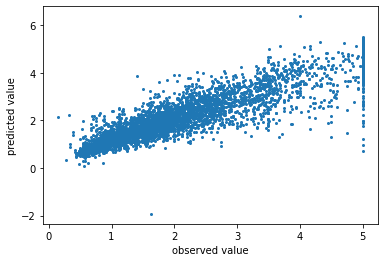

In [36]:
import matplotlib.pyplot as plt
mlflow.tensorflow.autolog()

with mlflow.start_run() as run:
    history = new_model.fit(X_train, y_train, epochs=35, callbacks=[early_stopping])
    
    #save the run information to register the mode later
    kerasURI = run.info.artifact_uri
    
    #Evaluate model on test dataset and log result
    mlflow.log_param('eval_result', new_model.evaluate(X_test, y_test)[0])
    
    #plot predicted vs known values for a quick visual check of the model and log the plot as an artifact
    keras_pred = new_model.predict(X_test)
    plt.plot(y_test, keras_pred, 'o', markersize=2)
    plt.xlabel('observed value')
    plt.ylabel('predicted value')
    plt.savefig('kplot.png')
    mlflow.log_artifact('kplot.png')

### Part 4. Register the model in MLflow and use the model to make predictions

In [37]:
import time

model_name = 'cal_houseing_keras'
model_uri = kerasURI+"/model"
new_model_version = mlflow.register_model(model_uri, model_name)

#Registering the model takes a few seconds, so add a delay before continuing with the next cell
time.sleep(5)

Successfully registered model 'cal_houseing_keras'.
2023/03/06 22:29:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: cal_houseing_keras, version 1
Created version '1' of model 'cal_houseing_keras'.


#### Load the model for inference and make predictions

In [38]:
keras_model = mlflow.keras.load_model(f"models:/{model_name}/{new_model_version.version}")

keras_pred = keras_model.predict(X_test)
keras_pred

129/129 [==============================] - 0s 273us/step


array([[2.1780827],
       [1.3704039],
       [1.4449769],
       ...,
       [1.48381  ],
       [4.3925176],
       [1.9161384]], dtype=float32)